# Project in Machine Learning Seminar - Algorithmic Trading 

### Submited by:
 - Yuval Haski
 - Michael Kogan
 - Michael Hohashvili
 
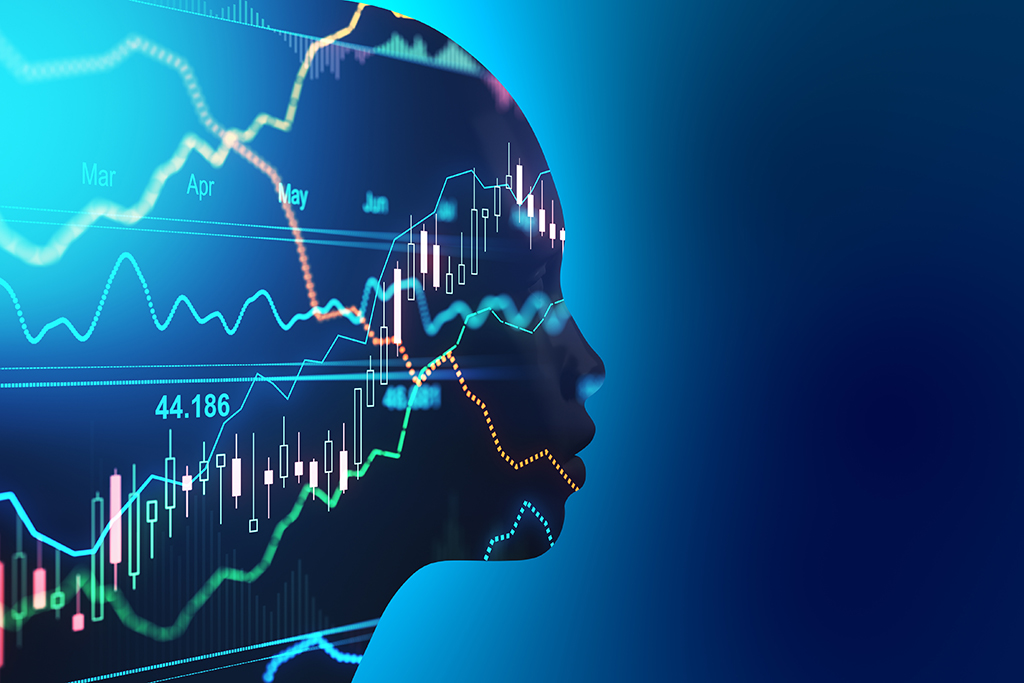

## Overview
- Con
- Con
- Con
- Con
- Con
- Con

## Is it possible to trade using machine learning models on technical analysis parameters?

### Intro
- In this project, we will be using Data from the S&P500 Index from Yahoo Finance as well as Technical Analysis - Indicators such as:
   - CCI
   - MACDH
   - RSI
   - KDJ
   - WR
   - ATR
   - CMF
- We will be using most of the indicators from Pandas_TA Library and only the WR indicator from StockStats Library because we ran into a problem of getting the indicator from Pandas_TA.  



### Importing pandas and numpy for data manipulation and matplotlib for visualization of the data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Upgrade the pip if needed and install yfinance, pandas_ta and stockstats packages

In [ ]:
pip install --upgrade pip

In [ ]:
pip install yfinance --upgrade --no-cache-dir --no-warn-script-location

In [ ]:
pip install pandas_ta

In [ ]:
pip install stockstats

### A function to show graphs with given data, title and color

In [2]:
def Show_Graph(data, title, color):
    plt.figure(figsize=(20,10))
    plt.plot(data, color)
    plt.title(title)
    plt.grid()
    plt.show()

## Use "^GSPC" for the S&P 500 Index
- Show the data from the end of 1927-Today the max data range


In [3]:
import yfinance as yf
sp500 = yf.Ticker("^GSPC")
hist = sp500.history(period="max")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-21 00:00:00-05:00,4963.029785,4983.209961,4946.000000,4981.799805,3788390000,0.0,0.0
2024-02-22 00:00:00-05:00,5038.830078,5094.390137,5038.830078,5087.029785,4051710000,0.0,0.0
2024-02-23 00:00:00-05:00,5100.919922,5111.060059,5081.459961,5088.799805,3672790000,0.0,0.0


## Retrieve historical data
- We are going to use Data from the beginning of the 2000 up until the end of 2023.
- For the data to not have null values with the indicators we are going to give the indicators the data from 15/11/1999. Because some of the indicators use data from around two weeks up to one month to calculate.


In [4]:
start_date = "1999-11-15"
end_date = "2023-12-31"

hist = sp500.history(start=start_date,end=end_date)
hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6070 entries, 1999-11-15 00:00:00-05:00 to 2023-12-29 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6070 non-null   float64
 1   High          6070 non-null   float64
 2   Low           6070 non-null   float64
 3   Close         6070 non-null   float64
 4   Volume        6070 non-null   int64  
 5   Dividends     6070 non-null   float64
 6   Stock Splits  6070 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 379.4 KB


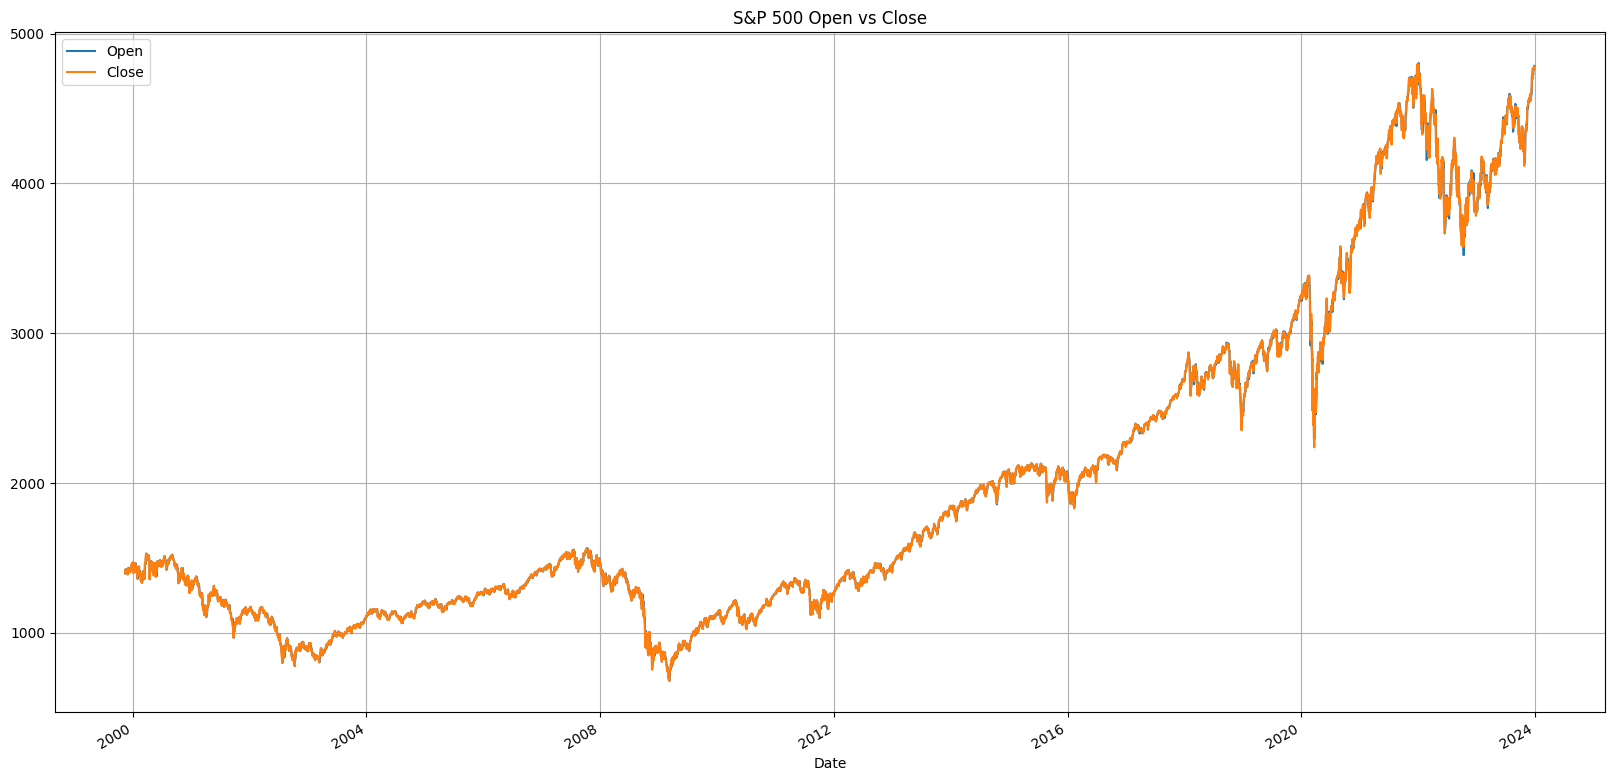

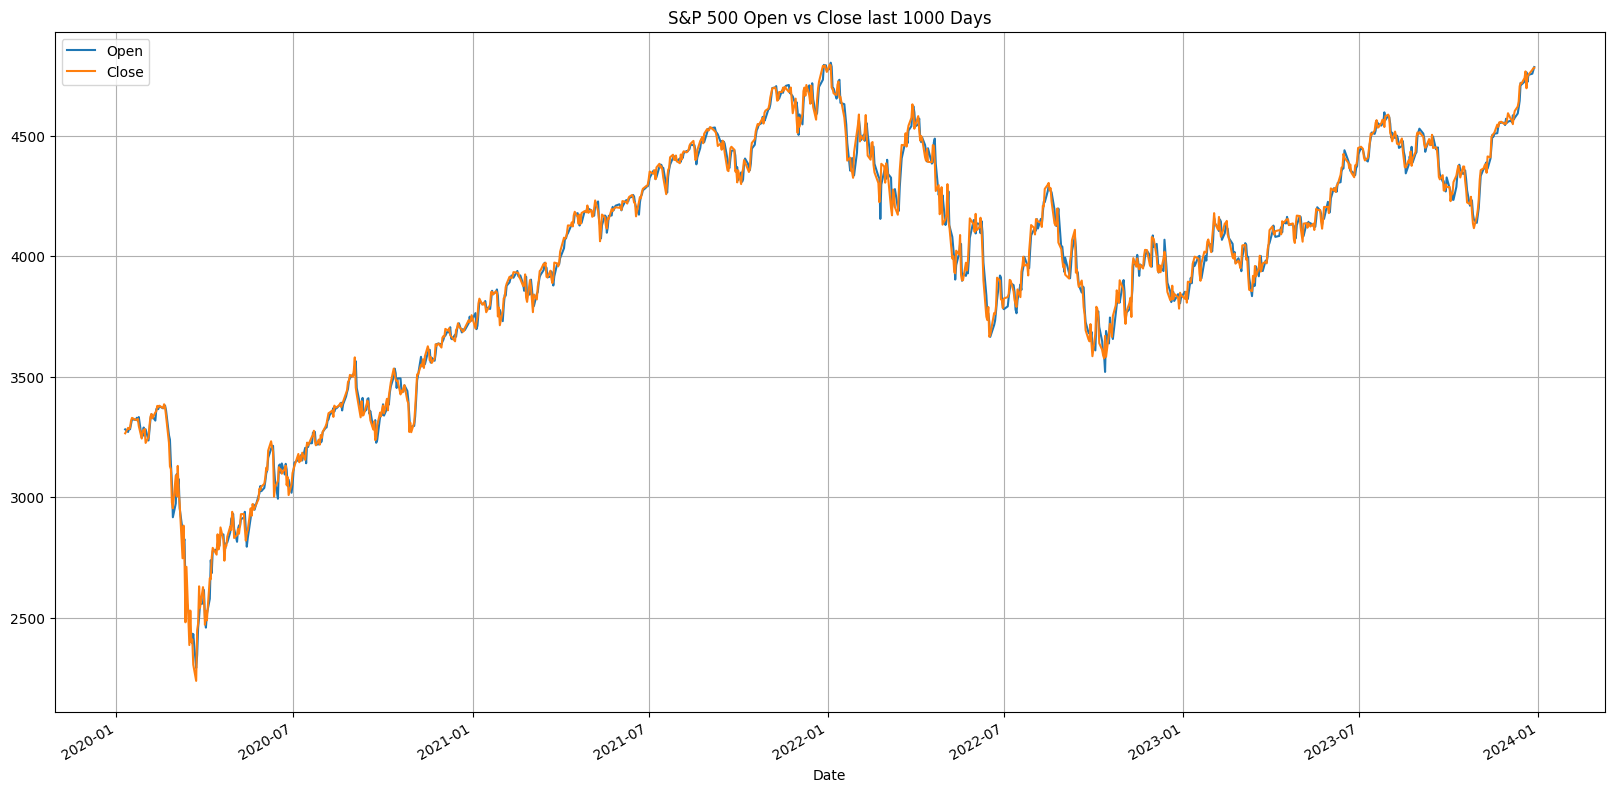

In [5]:
hist[["Open", "Close"]].plot(figsize=(20,10))
plt.title("S&P 500 Open vs Close")
plt.grid()
plt.show()

hist[["Open", "Close"]][-1000:-1].plot(figsize=(20,10))
plt.title("S&P 500 Open vs Close last 1000 Days")
plt.grid()
plt.show()

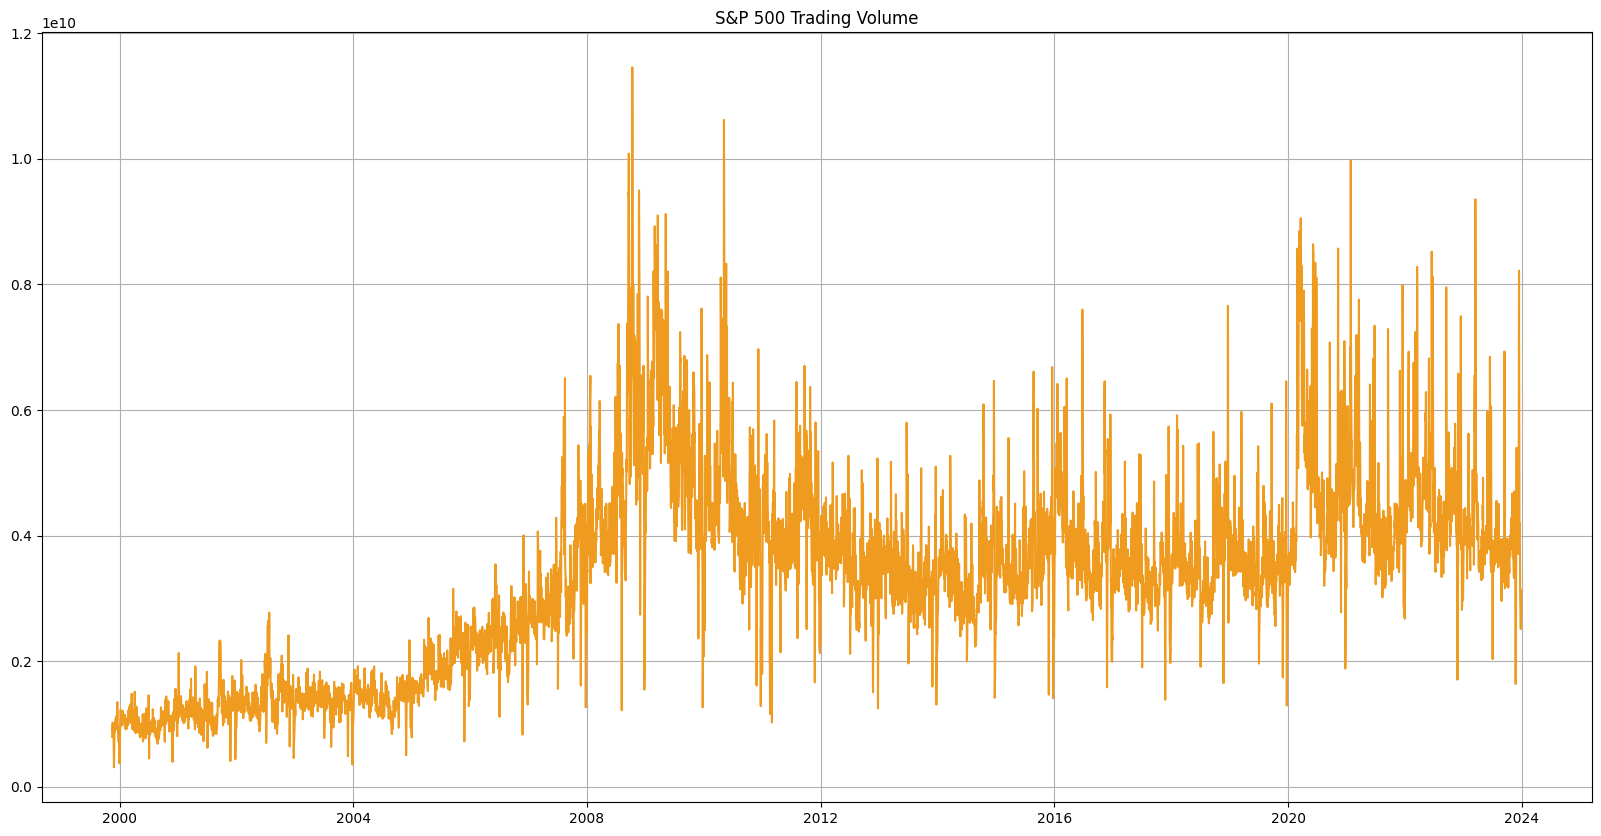

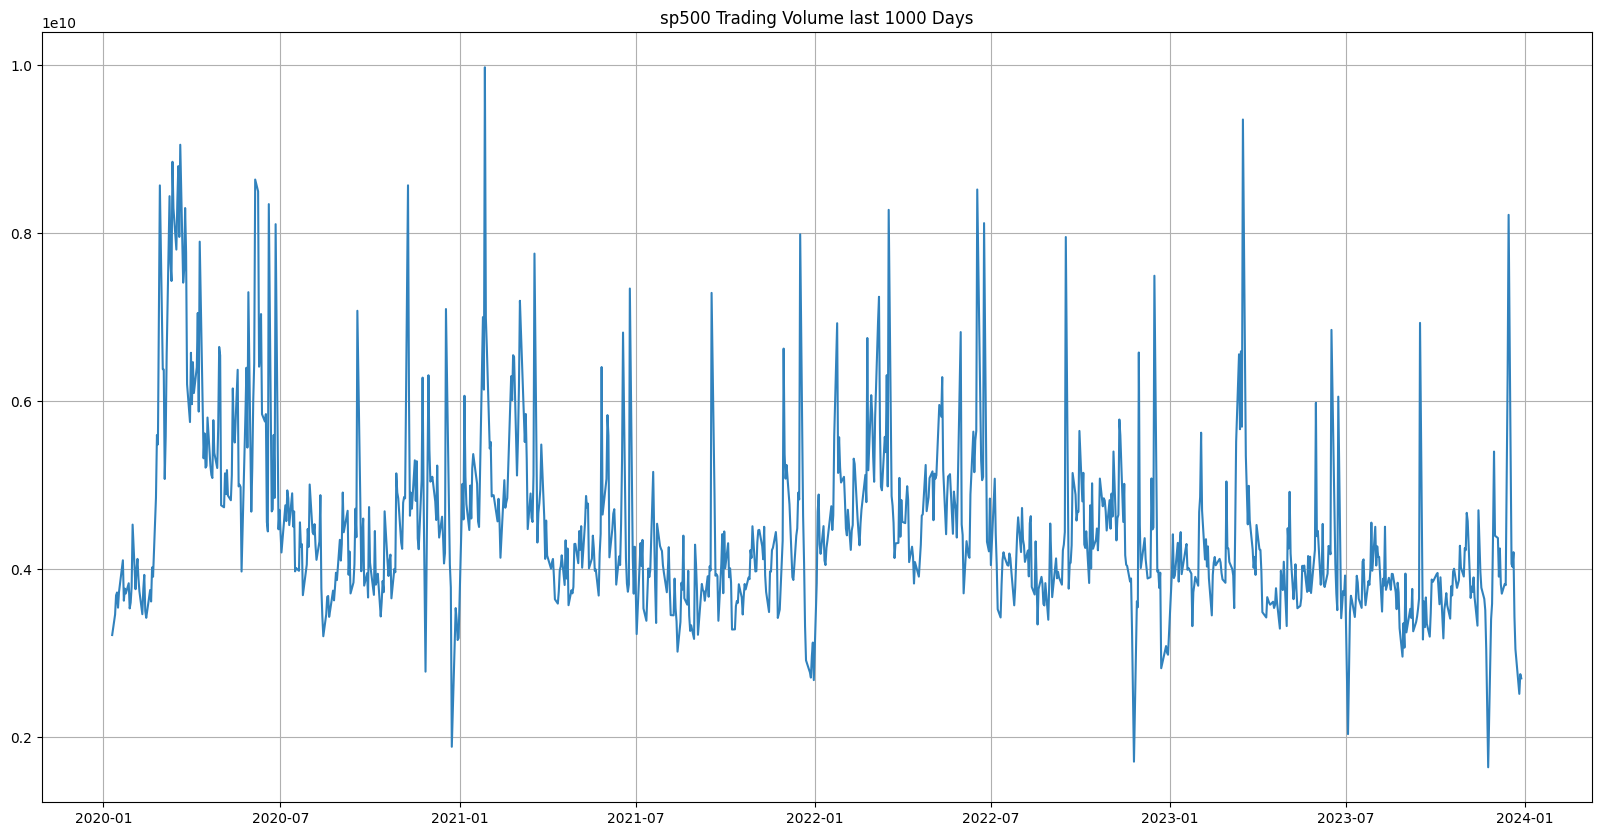

In [6]:
Show_Graph(hist["Volume"], "S&P 500 Trading Volume", '#ef9b20')

vol_sp500 = hist["Volume"][-1000:-1]
Show_Graph(vol_sp500, "sp500 Trading Volume last 1000 Days", '#3182BD')

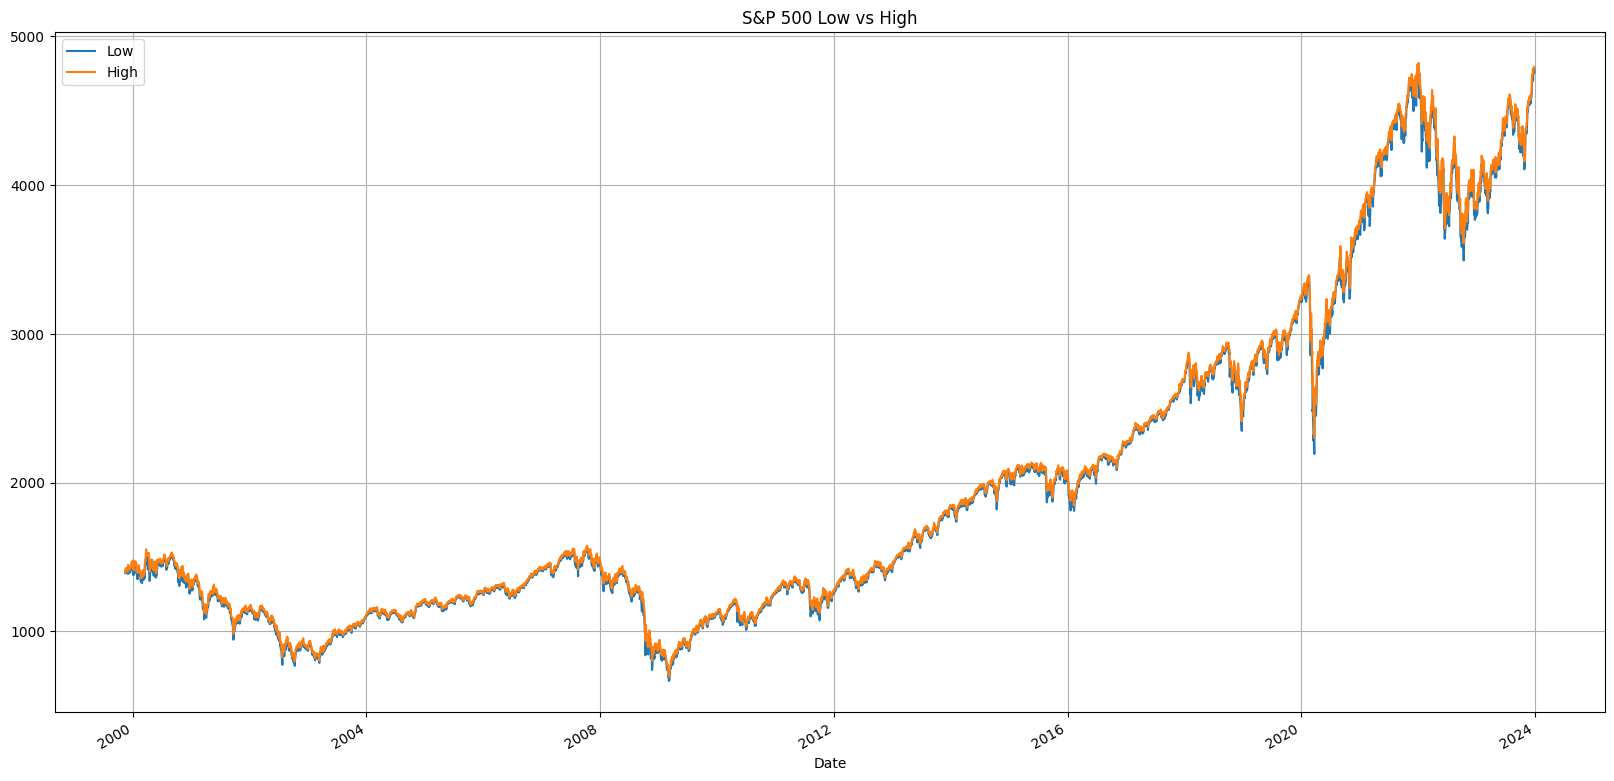

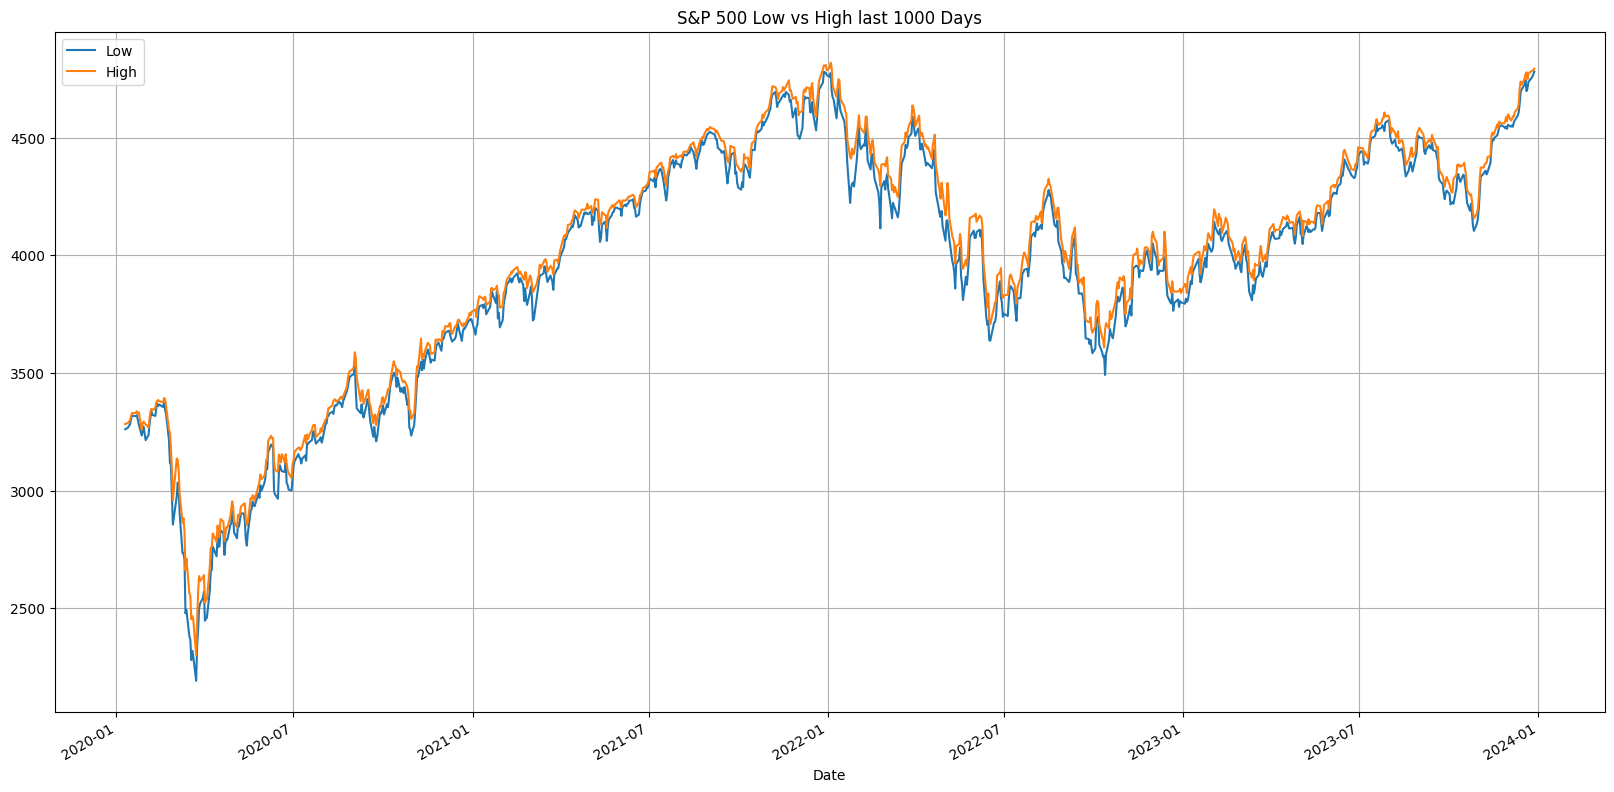

In [7]:
hist[["Low", "High"]].plot(figsize=(20,10))
plt.title("S&P 500 Low vs High")
plt.grid()
plt.show()

hist[["Low", "High"]][-1000:-1].plot(figsize=(20,10))
plt.title("S&P 500 Low vs High last 1000 Days")
plt.grid()
plt.show()


## Calculate and plot the indicators using pandas_ta
- It is a Technical analysis library that provide over 130 indicators directly on pandas DataFrame.

In [8]:
import pandas_ta as ta

### CCI (Commodity Channel Index)
- Purpose: CCI helps determine if an investment vehicle (such as a stock or currency) is overbought or oversold.
- Calculation: It uses the typical price, moving average, and mean deviation to create an unbounded oscillator.
- Interpretation:
  - Above Zero: Indicates that the price is above the historic average.
  - Below Zero: Suggests that the price is below the historic average.
- Application: Traders use CCI to identify potential turning points in price trends.

In [9]:
hist.ta.cci(append=True)

Date
1999-11-15 00:00:00-05:00          NaN
1999-11-16 00:00:00-05:00          NaN
1999-11-17 00:00:00-05:00          NaN
1999-11-18 00:00:00-05:00          NaN
1999-11-19 00:00:00-05:00          NaN
                               ...    
2023-12-22 00:00:00-05:00    83.642356
2023-12-26 00:00:00-05:00    92.697021
2023-12-27 00:00:00-05:00    92.573434
2023-12-28 00:00:00-05:00    99.210219
2023-12-29 00:00:00-05:00    72.177300
Name: CCI_14_0.015, Length: 6070, dtype: float64

#### Check for nulls CCI
- Before deciding to start the data on the date of 15/11/1999 we worked with the data from 01/01/2000, and we ran into a problem with nulls, we wanted to maybe fill it randomly using mean and std, but we understood that it could hurt the data of the indicators, so we decided to use the data from the said date.

In [10]:
hist.ta.cci(append=True).info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 6070 entries, 1999-11-15 00:00:00-05:00 to 2023-12-29 00:00:00-05:00
Series name: CCI_14_0.015
Non-Null Count  Dtype  
--------------  -----  
6057 non-null   float64
dtypes: float64(1)
memory usage: 94.8 KB


### CMF (Chaikin Money Flow)
- Description: CMF is a volume-weighted average that measures the accumulation and distribution of a stock over a specified period (usually 21 days).
- Principle:
  - When the closing price is closer to the high, it indicates more accumulation.
  - Conversely, when the closing price is closer to the low, it suggests more distribution.
- Interpretation:
  - CMF above the zero line indicates market strength.
  - CMF below zero suggests market weakness.  
- Application:
  - Use CMF to confirm breakouts through trend lines or support/resistance levels.
  - Look for divergences between CMF and price action for potential buy or sell signals.
- Calculation:
  - Volume-Weighted Average:
    - CMF is a volume-weighted average, which means it considers both price movement and trading volume.
    - It focuses on whether a stock is being accumulated (bought) or distributed (sold).
   - Typical Price Range:
     - We look at the typical price range for each day:
       - High Price (H): The highest price the stock reached during the day.
       - Low Price (L): The lowest price the stock reached during the day.
       - Closing Price: The price at which the stock closed for the day.
     - The typical price is calculated as the average of these three prices
   - Comparing Closing Price to Typical Price:
     - We compare the closing price to the typical price:
       - If the closing price is closer to the high, it suggests accumulation (buying pressure).
       - If the closing price is closer to the low, it indicates distribution (selling pressure).
    - Volume Consideration:
      - We consider the trading volume for each day.
      - If accumulation is happening (closing price closer to the high), we give more weight to the volume.
      - If distribution is happening (closing price closer to the low), we reduce the weight of the volume.  

In [11]:
hist.ta.cmf(append=True)

Date
1999-11-15 00:00:00-05:00         NaN
1999-11-16 00:00:00-05:00         NaN
1999-11-17 00:00:00-05:00         NaN
1999-11-18 00:00:00-05:00         NaN
1999-11-19 00:00:00-05:00         NaN
                               ...   
2023-12-22 00:00:00-05:00    0.325559
2023-12-26 00:00:00-05:00    0.352526
2023-12-27 00:00:00-05:00    0.371550
2023-12-28 00:00:00-05:00    0.403155
2023-12-29 00:00:00-05:00    0.355852
Name: CMF_20, Length: 6070, dtype: float64

#### Check for nulls in CMF

In [12]:
hist.ta.cmf(append=True).info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 6070 entries, 1999-11-15 00:00:00-05:00 to 2023-12-29 00:00:00-05:00
Series name: CMF_20
Non-Null Count  Dtype  
--------------  -----  
6051 non-null   float64
dtypes: float64(1)
memory usage: 94.8 KB


### KDJ 
- What Is KDJ?
  - The KDJ is an oscillating technical analysis indicator based on momentum and volatility.
  - It creates buy and sell signals by focusing on the overbought and oversold regions in asset prices.
  - The KDJ is similar to the Stochastic Oscillator, but it includes an additional line called the J line.
- Components of KDJ:
  - K (K-line): Represents a smoothed version of the price relative to previous trading ranges over a specific period.
  - D (D-line): A smoother version of the K-line, used to show long-term trends.
  - J (J-line): Derived from K and D lines, indicating potential overbought or oversold levels relative to past KDJ readings.
- How It Works:
  - The KDJ indicator has three elements:
    - %K (fast stochastic): Measures the current price level relative to recent highs and lows.
    - %D (slow stochastic): A smoothed version of %K.
    - J Line: Created by combining %K and %D lines, generating buy or sell signals when it crosses them.
- Interpretation:
  - Buy Signal: J line crossing up through K and D.
  - Sell Signal: J line crossing down through K and D.
  - KDJ can produce false signals, so careful analysis is essential.
- Best Practices:
   - KDJ is often more reliable on daily charts.  


In [13]:
hist.ta.kdj(append=True) # Stochastic KDJ

,K_9_3,D_9_3,J_9_3
Date,,,
1999-11-15 00:00:00-05:00,NaN,NaN,NaN
1999-11-16 00:00:00-05:00,NaN,NaN,NaN
1999-11-17 00:00:00-05:00,NaN,NaN,NaN
1999-11-18 00:00:00-05:00,NaN,NaN,NaN
1999-11-19 00:00:00-05:00,NaN,NaN,NaN
...,...,...,...
2023-12-22 00:00:00-05:00,84.276852,85.734158,81.362241
2023-12-26 00:00:00-05:00,87.169043,86.212453,89.082224
2023-12-27 00:00:00-05:00,90.051174,87.492027,95.169468


#### Check for nulls in KDJ

In [14]:
hist.ta.kdj(append=True).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6070 entries, 1999-11-15 00:00:00-05:00 to 2023-12-29 00:00:00-05:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   K_9_3   6060 non-null   float64
 1   D_9_3   6058 non-null   float64
 2   J_9_3   6058 non-null   float64
dtypes: float64(3)
memory usage: 189.7 KB


### ATR (Average True Range)
- Purpose: ATR shows investors the average range of price swings for an investment over a specified period.
- Calculation: 
  - ATR is typically derived from the 14-day simple moving average of a series of true range indicators.
  - The true range is the greatest of the following:
    - Current high minus current low.
    - Absolute value of current high minus previous close.
    - Absolute value of current low minus previous close.
  - ATR is a moving average of these true ranges.
- Interpretation:
  - When ATR rises, it means that the market is becoming more volatile.
  - When ATR drops, volatility is falling.

In [15]:
hist.ta.atr(append=True)

Date
1999-11-15 00:00:00-05:00          NaN
1999-11-16 00:00:00-05:00          NaN
1999-11-17 00:00:00-05:00          NaN
1999-11-18 00:00:00-05:00          NaN
1999-11-19 00:00:00-05:00          NaN
                               ...    
2023-12-22 00:00:00-05:00    41.184150
2023-12-26 00:00:00-05:00    40.391734
2023-12-27 00:00:00-05:00    38.684484
2023-12-28 00:00:00-05:00    36.801294
2023-12-29 00:00:00-05:00    36.775483
Name: ATRr_14, Length: 6070, dtype: float64

#### Check for nulls in ATR

In [16]:
hist.ta.atr(append=True).info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 6070 entries, 1999-11-15 00:00:00-05:00 to 2023-12-29 00:00:00-05:00
Series name: ATRr_14
Non-Null Count  Dtype  
--------------  -----  
6056 non-null   float64
dtypes: float64(1)
memory usage: 94.8 KB


### WR (Williams %R - Williams Percent Range)
- Definition: Williams %R compares a stock’s closing price to its high-low range over a specific period (usually 14 days).
- Purpose: It assists in finding entry and exit points.
- Reading Interpretation:
  - Above -20: Indicates overbought conditions.
  - Below -80: Suggests oversold conditions.
  - Overbought or oversold readings don’t guarantee price reversals.
  

In [17]:
from stockstats import wrap
hist_copy = hist.copy()

stock_stats = wrap(hist_copy)
wr = stock_stats['wr']
wr

Date
1999-11-15 00:00:00-05:00   -66.507780
1999-11-16 00:00:00-05:00    -1.032904
1999-11-17 00:00:00-05:00   -40.853711
1999-11-18 00:00:00-05:00    -1.120548
1999-11-19 00:00:00-05:00   -10.021361
                               ...    
2023-12-22 00:00:00-05:00   -10.098875
2023-12-26 00:00:00-05:00    -4.185293
2023-12-27 00:00:00-05:00    -1.730508
2023-12-28 00:00:00-05:00    -4.538277
2023-12-29 00:00:00-05:00   -11.740166
Name: wr, Length: 6070, dtype: float64

#### Check for nulls in WR

In [18]:
wr.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 6070 entries, 1999-11-15 00:00:00-05:00 to 2023-12-29 00:00:00-05:00
Series name: wr
Non-Null Count  Dtype  
--------------  -----  
6070 non-null   float64
dtypes: float64(1)
memory usage: 94.8 KB


In [19]:
hist = hist.join(stock_stats['wr'], rsuffix="WR_14")
hist.rename(columns={"wr":"WR"}, inplace=True)

### MACD (Moving Average Convergence Divergence)
- What Is MACD?
  - The MACD (or MAC-D) is a trend-following momentum indicator.
  - It reveals the relationship between two exponential moving averages (EMAs) of a security’s price.
  - The primary components are
    - MACD Line: Calculated by subtracting the 26-period EMA from the 12-period EMA.
    - Signal Line: A nine-day EMA of the MACD line.
  - The MACD line and signal line can trigger buy or sell signals.
- Interpretation:
  - Crossovers:
    - Buy Signal: When the MACD line crosses above the signal line.
    - Sell Signal: When the MACD line crosses below the signal line.
  - Overbought/Oversold:
    - MACD can help gauge whether a security is overbought or oversold.
    - It alerts traders to the strength of a directional move and potential price reversals.
  - Divergences:
    - Bullish Divergence: New price highs not confirmed by new MACD highs (potential reversal).
    - Bearish Divergence: New price lows not confirmed by new MACD lows (potential reversal).
- Calculation:
  - The MACD is calculated by subtracting the long-term EMA (26 periods) from the short-term EMA (12 periods).
  - An EMA places more weight on recent data points than a simple moving average (SMA).
- Reading the MACD Chart:
  - Positive Value: When the 12-period EMA is above the 26-period EMA.
  - Negative Value: When the 12-period EMA is below the 26-period EMA.
  - The distance between the MACD line and its baseline indicates the gap between the two EMAs.
- Usage Recommendations:
  - Daily Periods: MACD works best with daily periods (traditional settings: 26/12/9 days).
  - Confirmation: After a signal line crossover, wait for three or four days to confirm it’s not a false move.

In [20]:
hist.ta.macd(append=True)

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
1999-11-15 00:00:00-05:00,NaN,NaN,NaN
1999-11-16 00:00:00-05:00,NaN,NaN,NaN
1999-11-17 00:00:00-05:00,NaN,NaN,NaN
1999-11-18 00:00:00-05:00,NaN,NaN,NaN
1999-11-19 00:00:00-05:00,NaN,NaN,NaN
...,...,...,...
2023-12-22 00:00:00-05:00,77.173143,3.547671,73.625472
2023-12-26 00:00:00-05:00,77.822249,3.357421,74.464827
2023-12-27 00:00:00-05:00,77.988793,2.819173,75.169621


#### Check for nulls in MACD, MACDh and MACDs

In [21]:
hist.ta.macd(append=True).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6070 entries, 1999-11-15 00:00:00-05:00 to 2023-12-29 00:00:00-05:00
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MACD_12_26_9   6045 non-null   float64
 1   MACDh_12_26_9  6037 non-null   float64
 2   MACDs_12_26_9  6037 non-null   float64
dtypes: float64(3)
memory usage: 189.7 KB


### RSI (Relative Strength Index)
- Purpose and Basics:
  - RSI measures the speed and magnitude of recent price changes in a security.
  - It evaluates whether the security is overvalued or undervalued.
  - Displayed as an oscillator (a line graph) on a scale of zero to 100.
- Calculation:
  - The RSI compares a security’s strength on days when prices go up to its strength on days when prices go down.
  - The average gain or loss considers the percentage gain or loss during a look-back period.
  - Periods with price losses are counted as zero in average gain calculations, and vice versa.
- Interpretation:
  - Overbought: RSI above 70 indicates an overbought situation.
  - Oversold: RSI below 30 indicates an oversold condition.
  - RSI crossing above or below these levels can signal buy or sell opportunities.
- Best Use Cases:
  - RSI works well in trading ranges rather than trending markets.
  - Combining RSI with other indicators for better-informed trading decisions.

In [22]:
hist.ta.rsi(append=True)

Date
1999-11-15 00:00:00-05:00          NaN
1999-11-16 00:00:00-05:00          NaN
1999-11-17 00:00:00-05:00          NaN
1999-11-18 00:00:00-05:00          NaN
1999-11-19 00:00:00-05:00          NaN
                               ...    
2023-12-22 00:00:00-05:00    71.069402
2023-12-26 00:00:00-05:00    72.704374
2023-12-27 00:00:00-05:00    73.256889
2023-12-28 00:00:00-05:00    73.407118
2023-12-29 00:00:00-05:00    70.164874
Name: RSI_14, Length: 6070, dtype: float64

#### Check for nulls in RSI

In [23]:
hist.ta.rsi(append=True).info() # Relative Strength Index

<class 'pandas.core.series.Series'>
DatetimeIndex: 6070 entries, 1999-11-15 00:00:00-05:00 to 2023-12-29 00:00:00-05:00
Series name: RSI_14
Non-Null Count  Dtype  
--------------  -----  
6056 non-null   float64
dtypes: float64(1)
memory usage: 223.9 KB


In [24]:
hist.rename(columns={"CCI_14_0.015": "CCI"}, inplace=True)
hist.rename(columns={"CMF_20": "CMF"}, inplace=True)
hist.rename(columns={"K_9_3": "K"}, inplace=True)
hist.rename(columns={"D_9_3": "D"}, inplace=True)
hist.rename(columns={"J_9_3": "J"}, inplace=True)
hist.rename(columns={"ATRr_14": "ATR"}, inplace=True)
hist.rename(columns={"MACD_12_26_9":"MACD"}, inplace=True)
hist.rename(columns={"MACDh_12_26_9":"MACDh"}, inplace=True)
hist.rename(columns={"MACDs_12_26_9":"MACDs"}, inplace=True)
hist.rename(columns={"RSI_14":"RSI"}, inplace=True)
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,CCI,CMF,K,D,J,ATR,WR,MACD,MACDh,MACDs,RSI
Date,,,,,,,,,,,,,,,,,,
1999-11-15 00:00:00-05:00,1396.060059,1398.579956,1392.280029,1394.390015,795700000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-66.507780,NaN,NaN,NaN,NaN
1999-11-16 00:00:00-05:00,1394.390015,1420.359985,1394.390015,1420.069946,942200000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.032904,NaN,NaN,NaN,NaN
1999-11-17 00:00:00-05:00,1420.069946,1423.439941,1410.689941,1410.709961,960000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-40.853711,NaN,NaN,NaN,NaN
1999-11-18 00:00:00-05:00,1410.709961,1425.310059,1410.709961,1424.939941,1022800000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.120548,NaN,NaN,NaN,NaN
1999-11-19 00:00:00-05:00,1424.939941,1424.939941,1417.540039,1422.000000,893800000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-10.021361,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,0.0,0.0,83.642356,0.325559,84.276852,85.734158,81.362241,41.184150,-10.098875,77.173143,3.547671,73.625472,71.069402
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,0.0,0.0,92.697021,0.352526,87.169043,86.212453,89.082224,40.391734,-4.185293,77.822249,3.357421,74.464827,72.704374
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,0.0,0.0,92.573434,0.371550,90.051174,87.492027,95.169468,38.684484,-1.730508,77.988793,2.819173,75.169621,73.256889


#### Check for nulls in the Data

In [25]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6070 entries, 1999-11-15 00:00:00-05:00 to 2023-12-29 00:00:00-05:00
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6070 non-null   float64
 1   High          6070 non-null   float64
 2   Low           6070 non-null   float64
 3   Close         6070 non-null   float64
 4   Volume        6070 non-null   int64  
 5   Dividends     6070 non-null   float64
 6   Stock Splits  6070 non-null   float64
 7   CCI           6057 non-null   float64
 8   CMF           6051 non-null   float64
 9   K             6060 non-null   float64
 10  D             6058 non-null   float64
 11  J             6058 non-null   float64
 12  ATR           6056 non-null   float64
 13  WR            6070 non-null   float64
 14  MACD          6045 non-null   float64
 15  MACDh         6037 non-null   float64
 16  MACDs         6037 non-null   float64
 17  RSI           6056 non-

In [26]:
# Remove the rows with any null value
hist = hist.dropna(axis=0, how='any')
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,CCI,CMF,K,D,J,ATR,WR,MACD,MACDh,MACDs,RSI
Date,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,0.0,0.0,57.257897,-0.074827,81.461181,84.875349,74.632844,17.357043,-27.848430,14.245674,3.872801,10.372873,62.029200
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,0.0,0.0,-80.581807,-0.108487,55.130288,74.959936,15.470991,20.497901,-96.063459,9.271652,-0.880977,10.152629,38.728824
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,0.0,0.0,-139.853529,-0.025094,44.870744,64.929941,4.752351,21.662980,-75.647982,5.483548,-3.735265,9.218813,39.900828
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,0.0,0.0,-114.773464,0.037119,38.476350,56.111922,3.205205,21.519990,-74.312289,2.560062,-5.327001,7.887062,40.511268
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,0.0,0.0,-36.048361,0.090031,46.846435,53.023390,34.492525,22.987410,-36.413526,3.273343,-3.690976,6.964319,54.601534


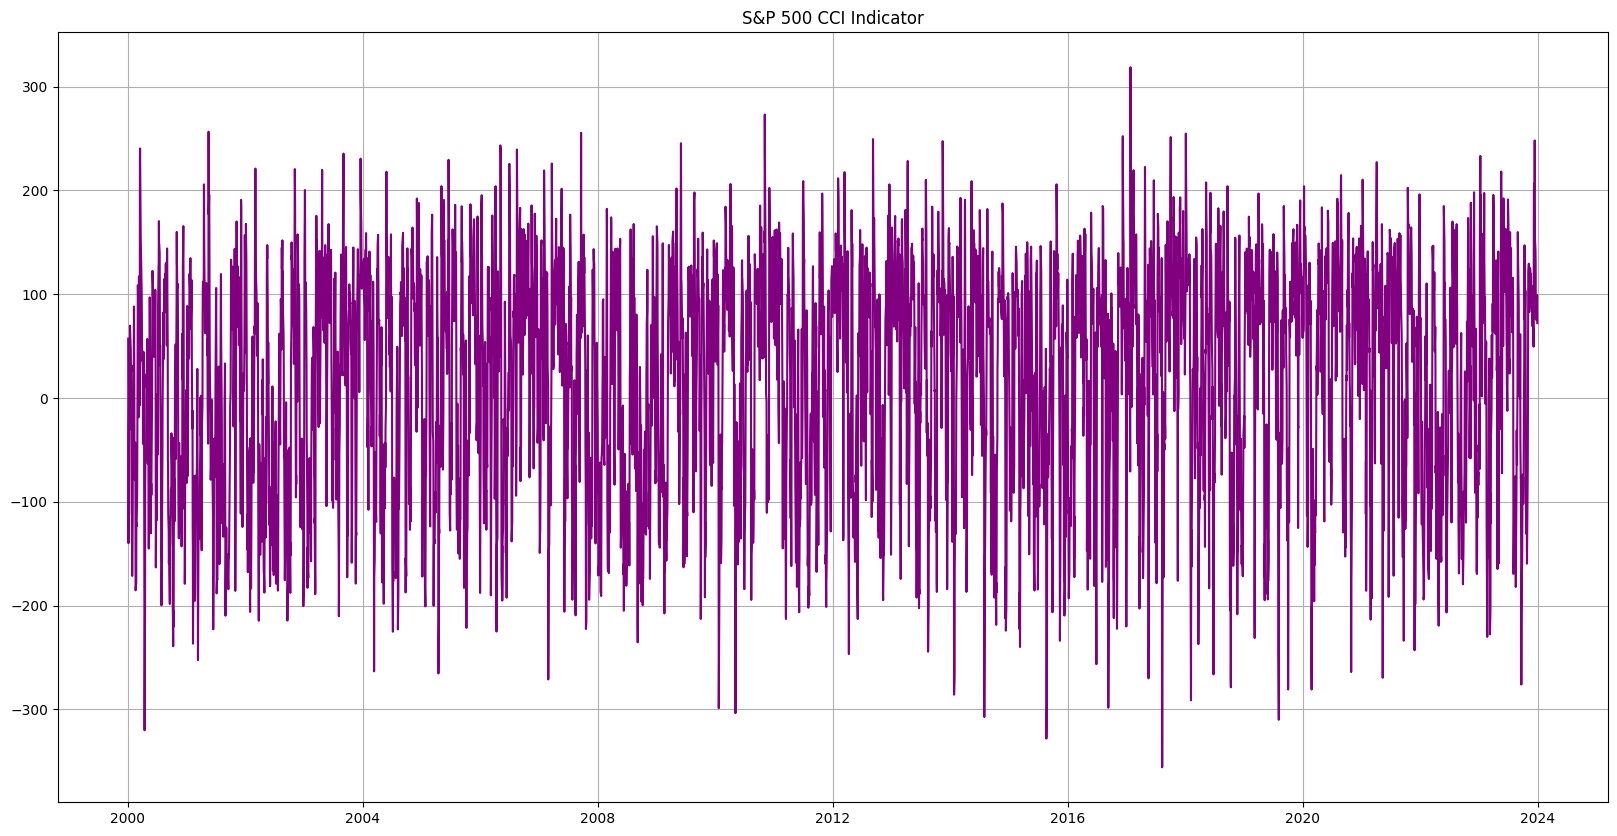

In [27]:
Show_Graph(hist[["CCI"]], "S&P 500 CCI Indicator", '#800080')

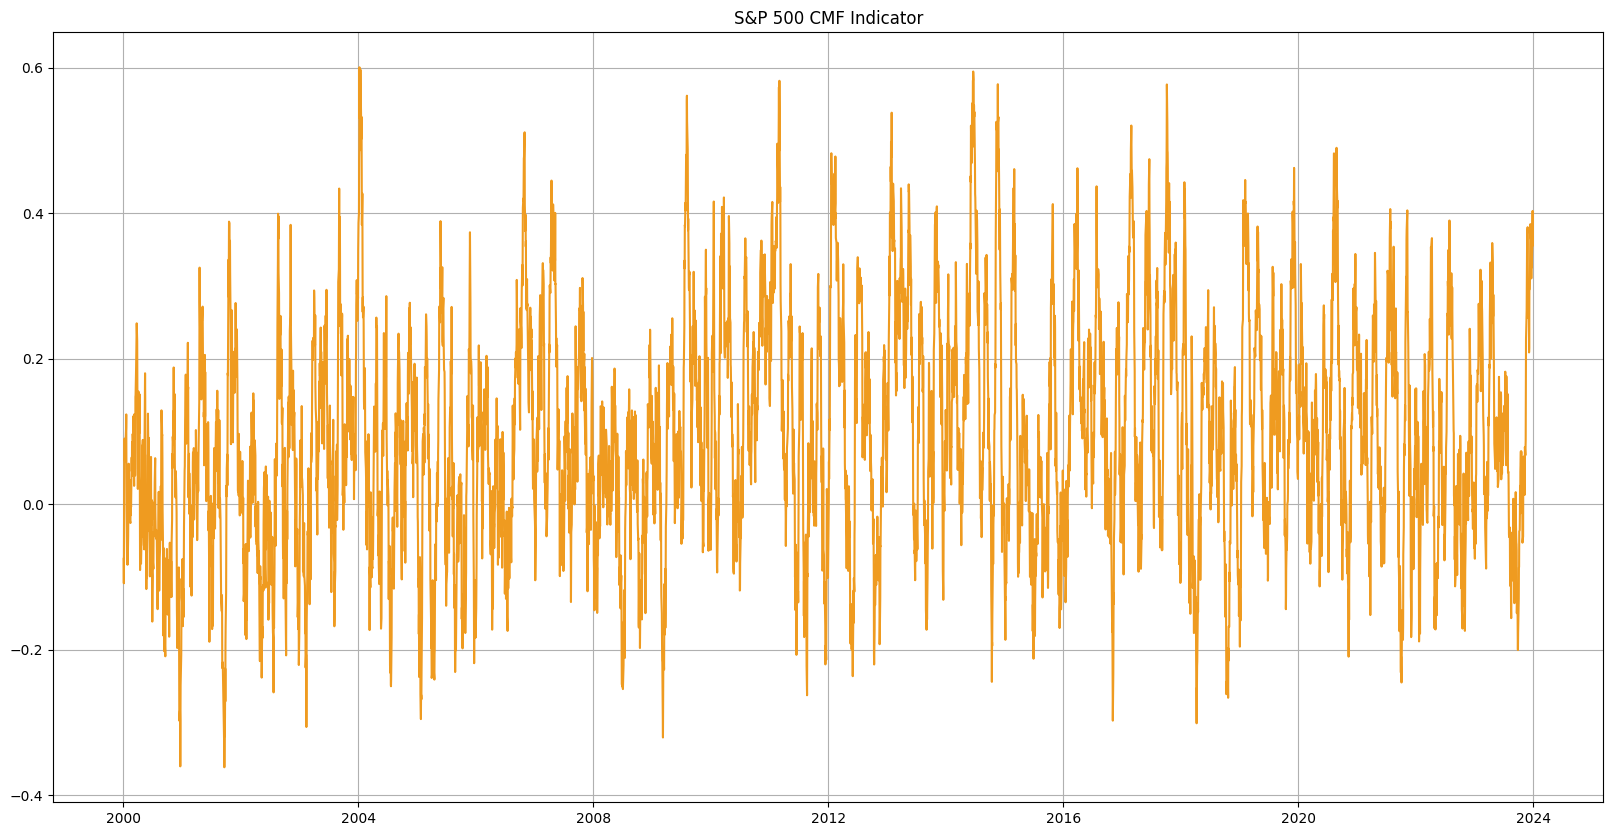

In [28]:
Show_Graph(hist[["CMF"]], "S&P 500 CMF Indicator", '#ef9b20')

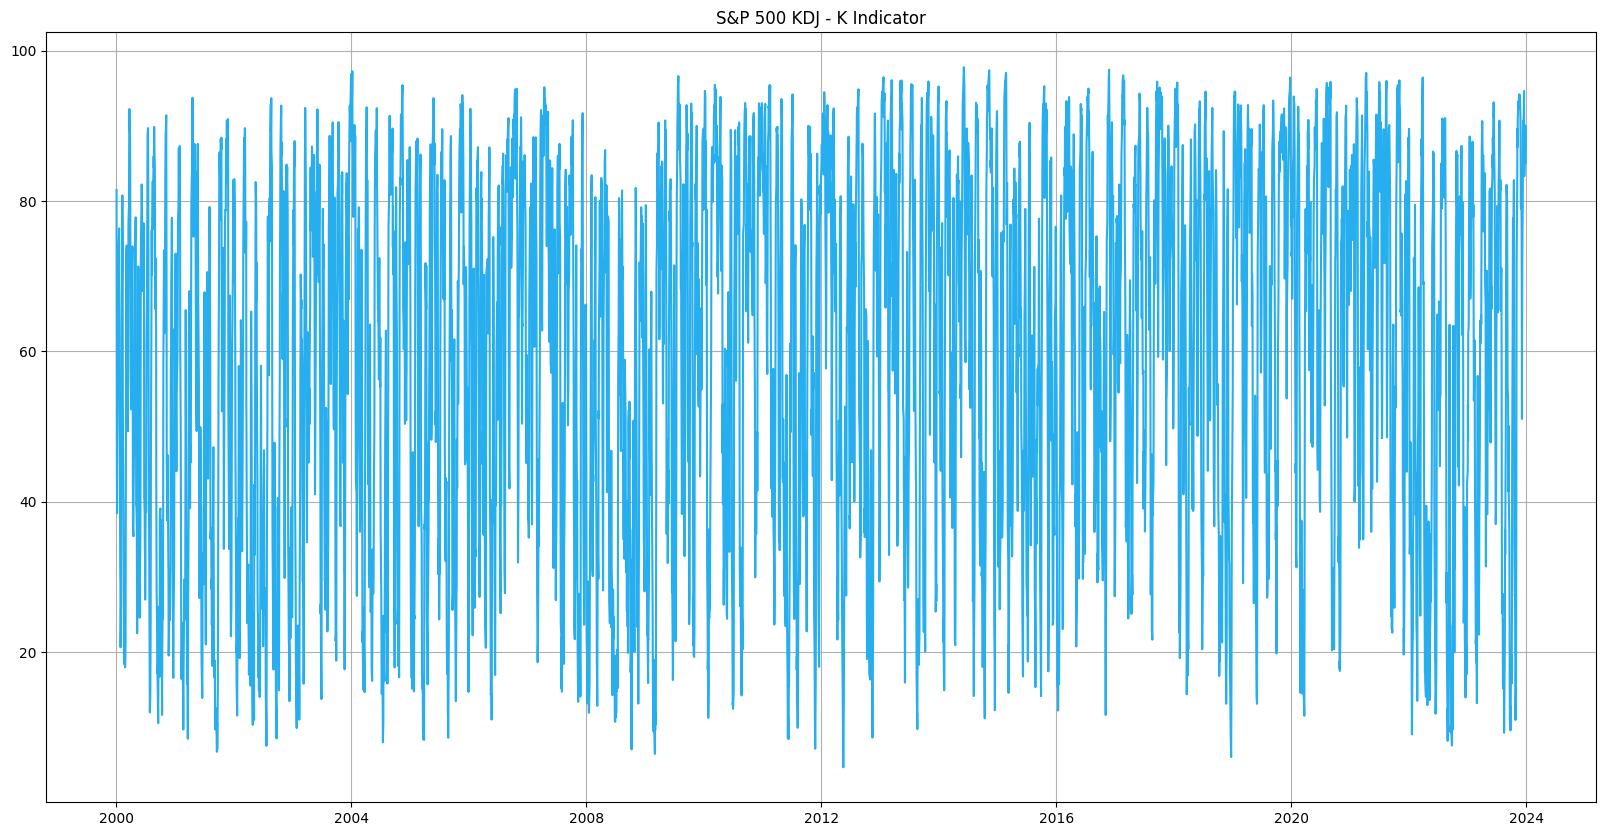

In [29]:
Show_Graph(hist[["K"]], "S&P 500 KDJ - K Indicator", '#27aeef')

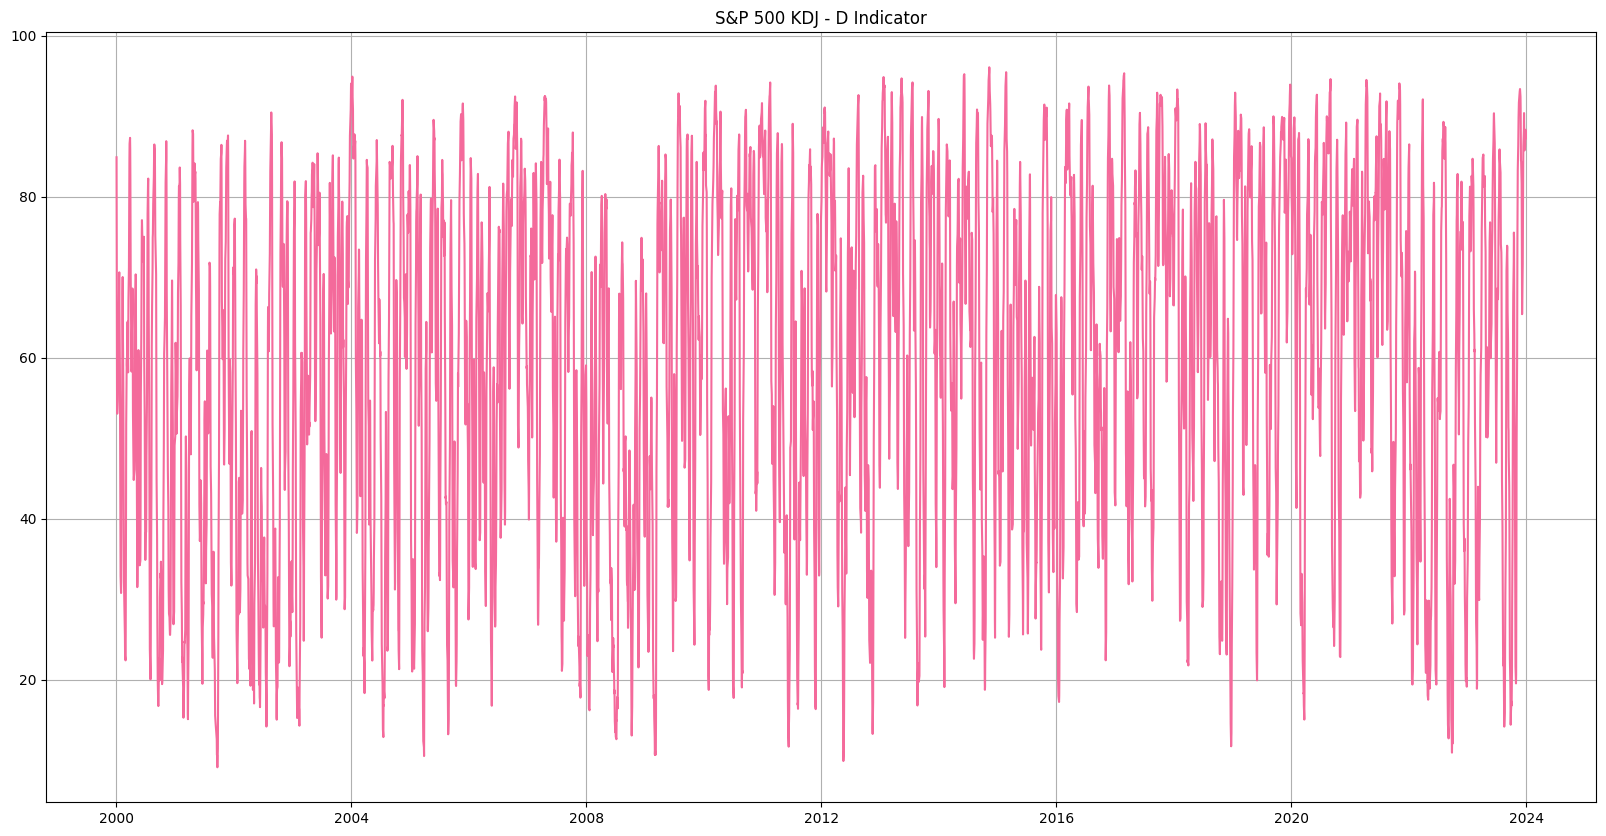

In [30]:
Show_Graph(hist[["D"]], "S&P 500 KDJ - D Indicator", '#f46a9b')

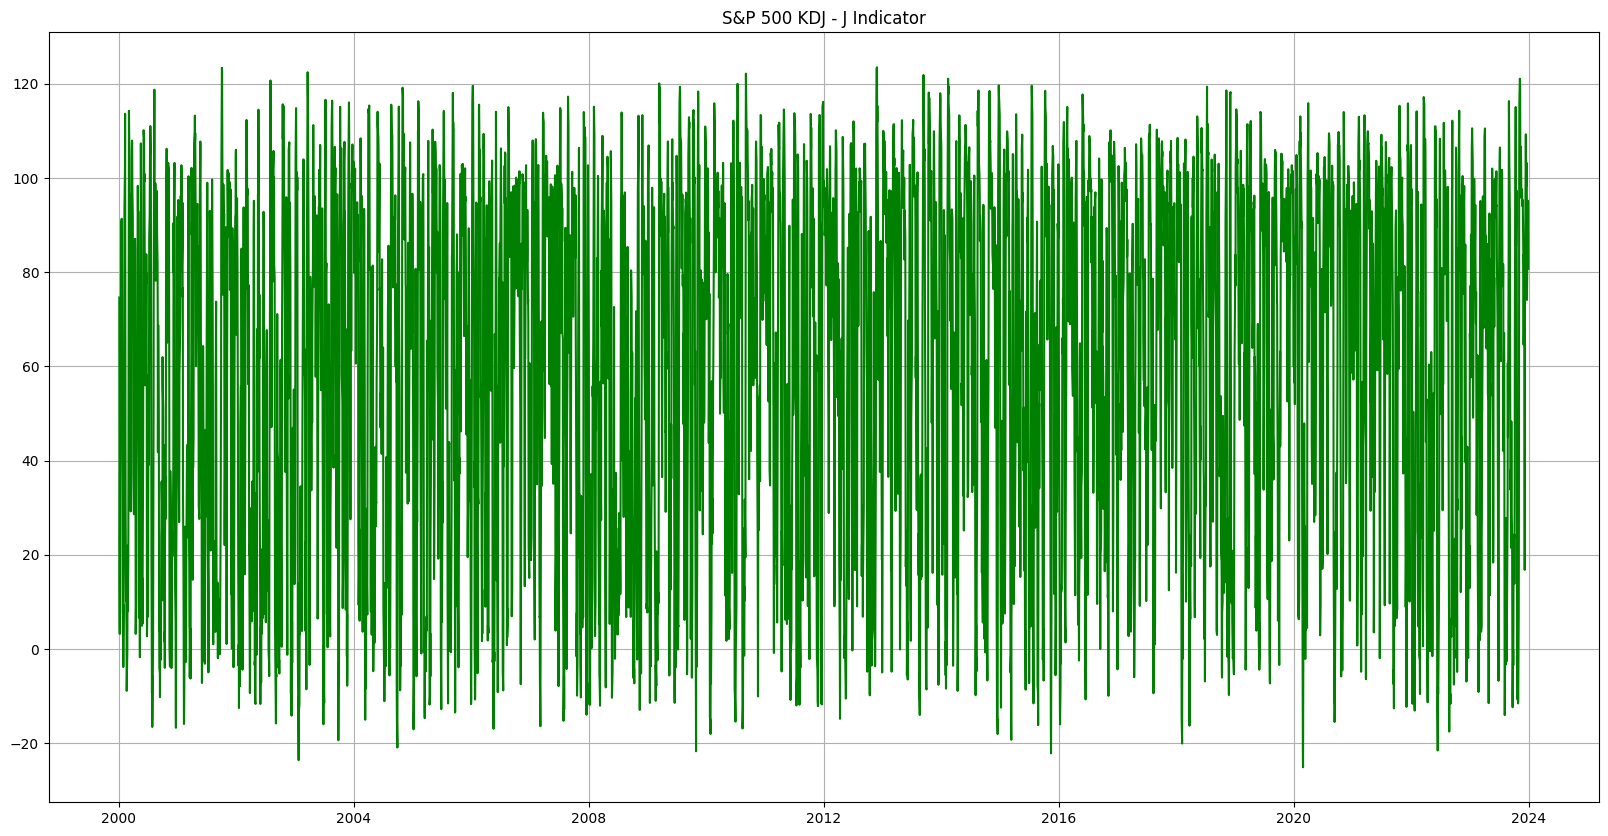

In [31]:
Show_Graph(hist[["J"]], "S&P 500 KDJ - J Indicator", '#008000')

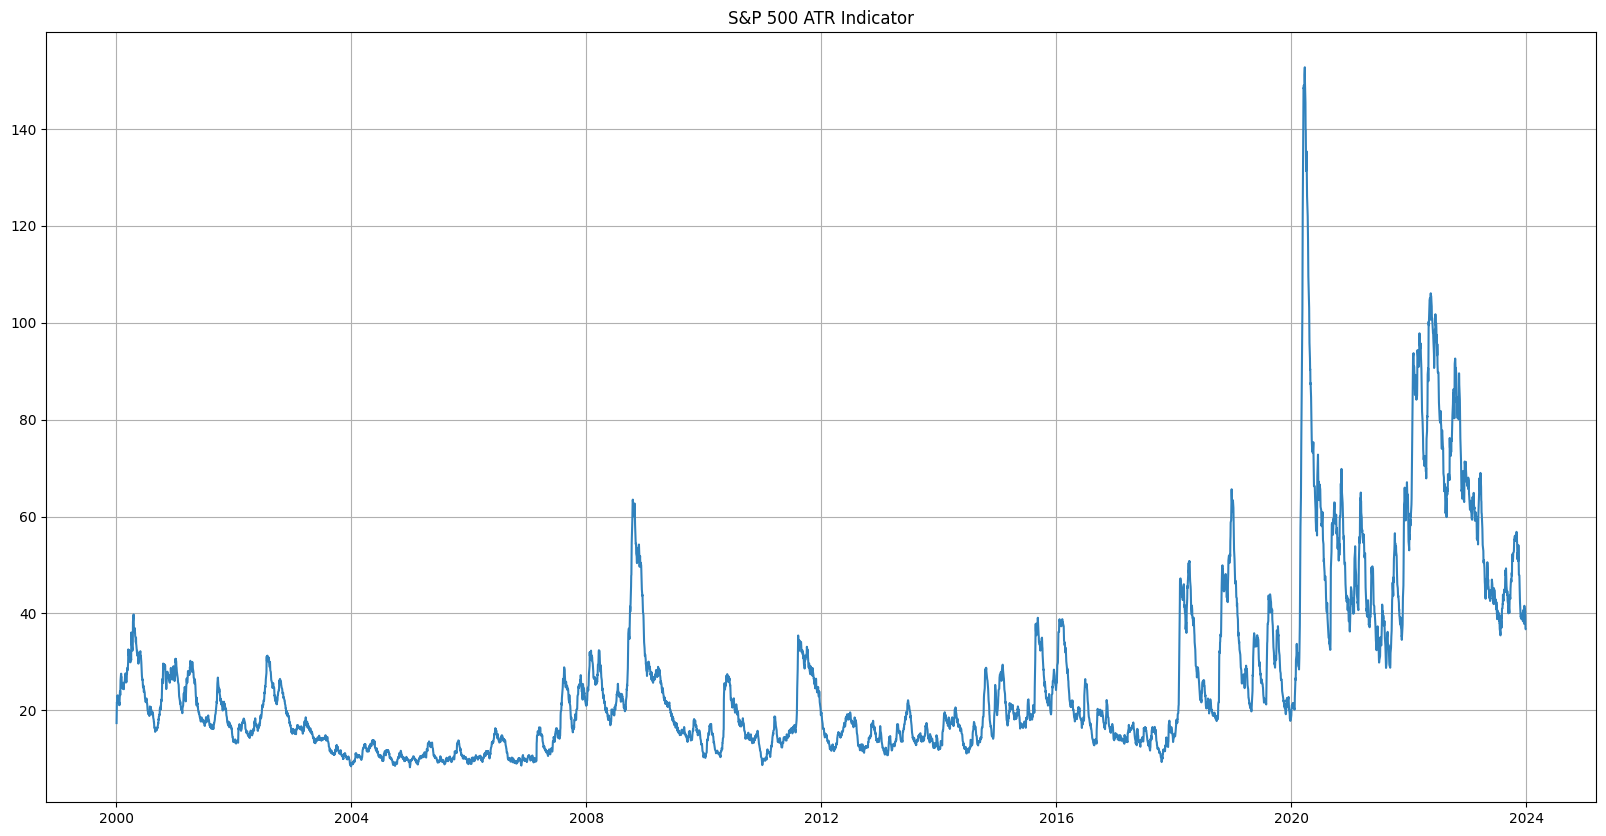

In [32]:
Show_Graph(hist[["ATR"]], "S&P 500 ATR Indicator", '#3182BD')

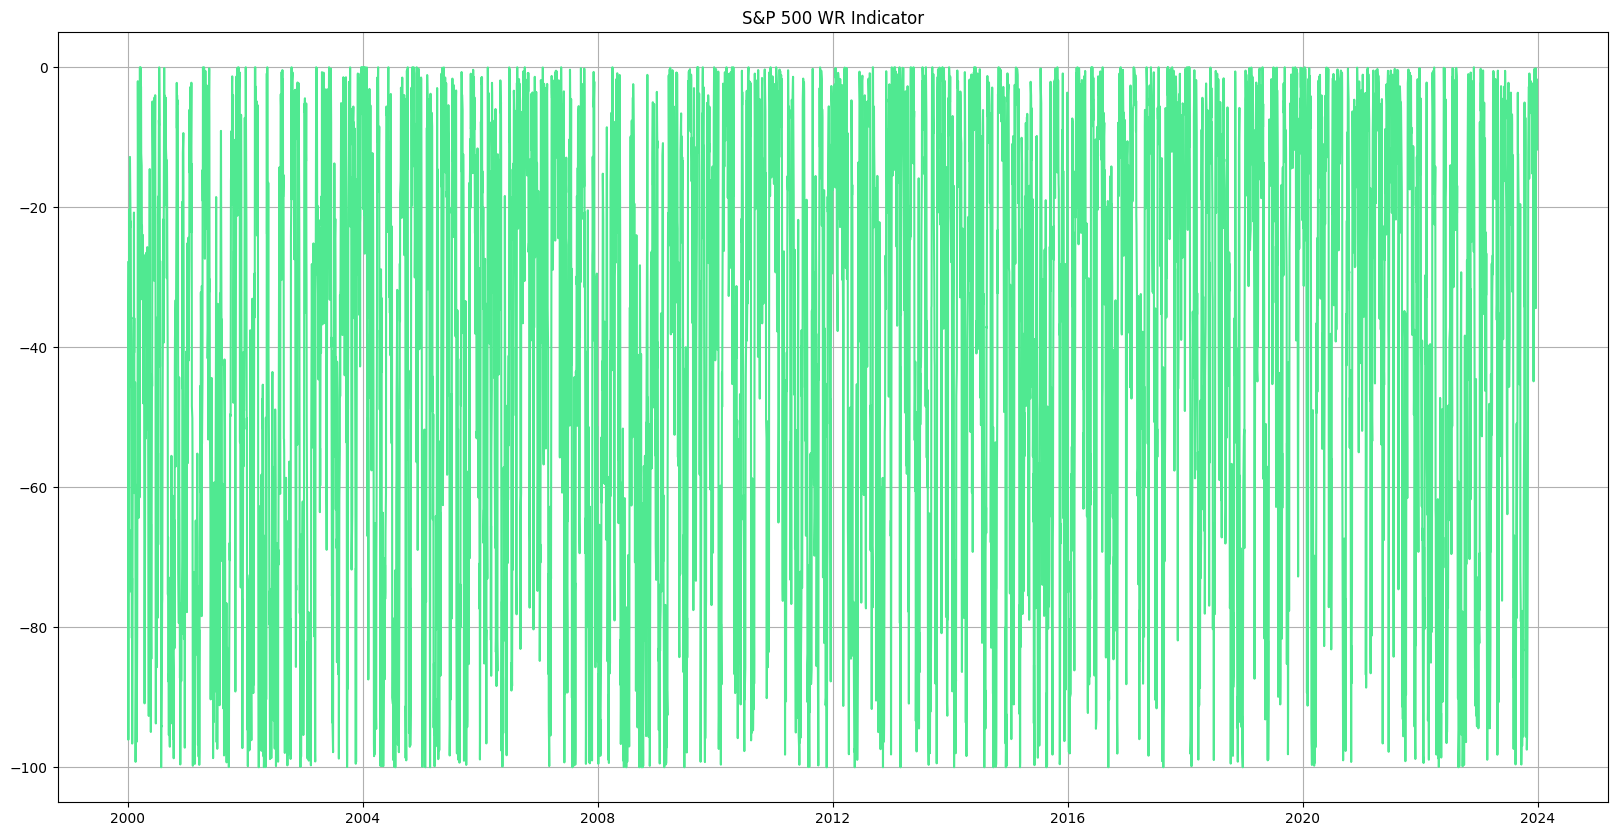

In [33]:
Show_Graph(hist[["WR"]], "S&P 500 WR Indicator", '#50e991')

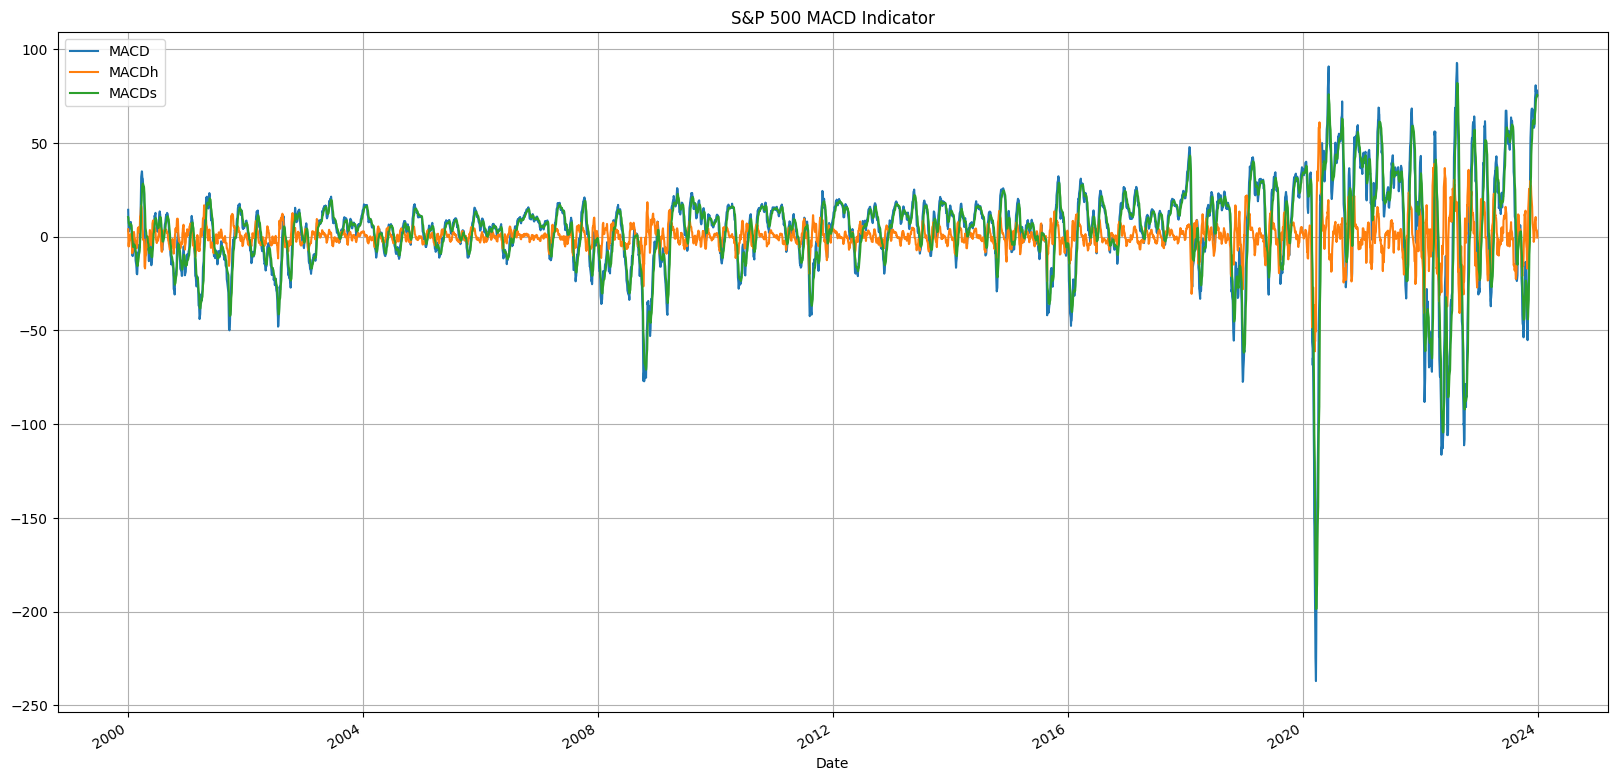

In [34]:
hist[["MACD", "MACDh", "MACDs"]].plot(figsize=(20,10)) # Plot the close price and the macd indicator
plt.title("S&P 500 MACD Indicator")
plt.grid()
plt.show()

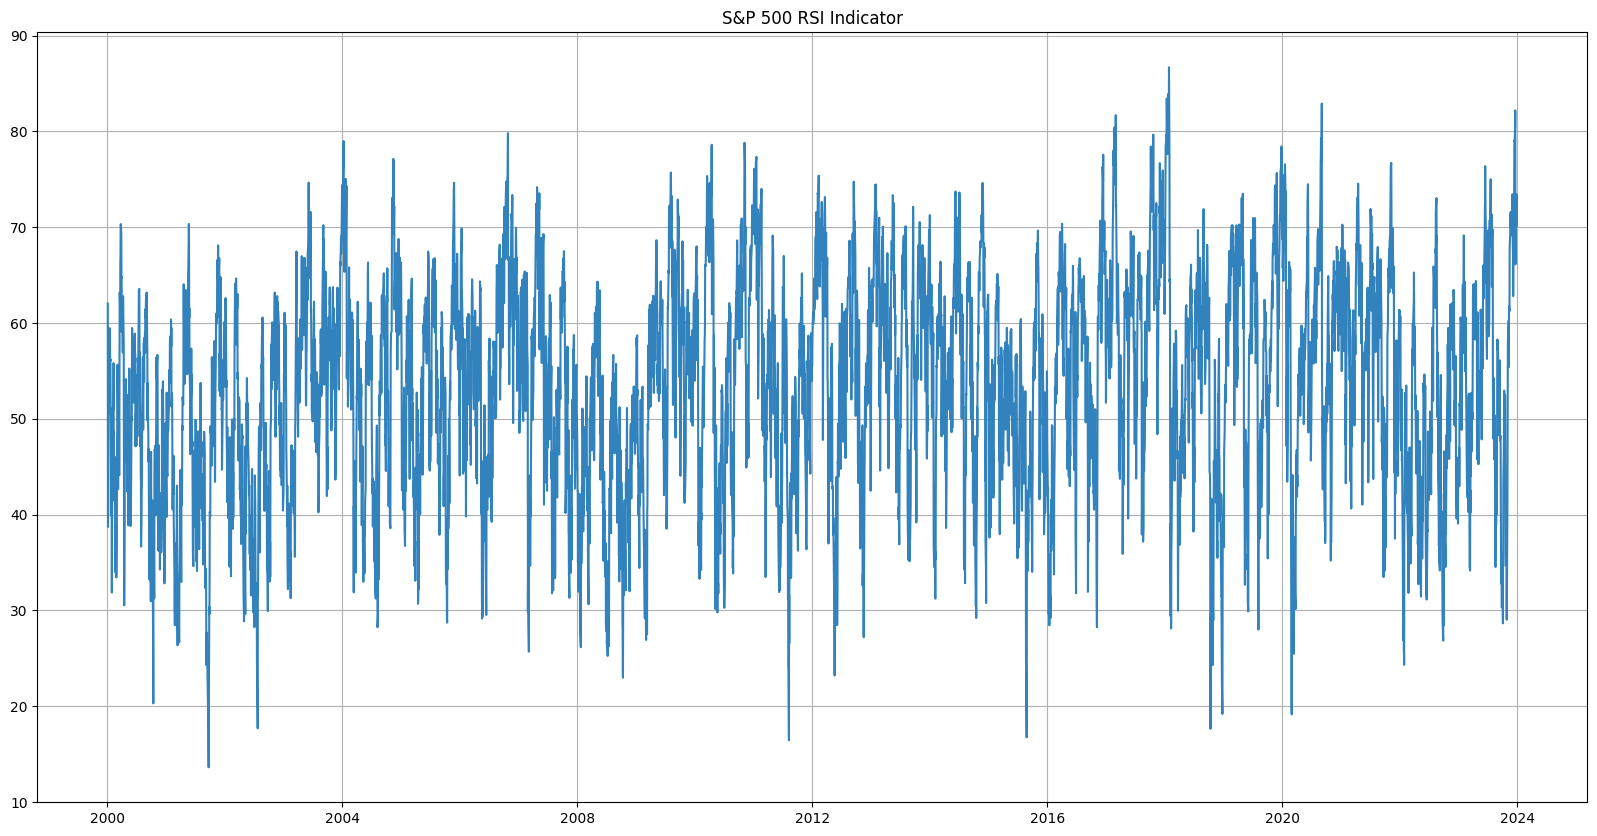

In [35]:
Show_Graph(hist[["RSI"]], "S&P 500 RSI Indicator", '#3182BD')

In [36]:
print(hist.columns.tolist())

['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'CCI', 'CMF', 'K', 'D', 'J', 'ATR', 'WR', 'MACD', 'MACDh', 'MACDs', 'RSI']


In [37]:
hist = hist.drop('Dividends', axis=1)
hist = hist.drop('Stock Splits', axis=1)
data = hist.drop('Low', axis=1)
data = data.drop('High', axis=1)
data.head()

,Open,Close,Volume,CCI,CMF,K,D,J,ATR,WR,MACD,MACDh,MACDs,RSI
Date,,,,,,,,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1455.219971,931800000,57.257897,-0.074827,81.461181,84.875349,74.632844,17.357043,-27.848430,14.245674,3.872801,10.372873,62.029200
2000-01-04 00:00:00-05:00,1455.219971,1399.420044,1009000000,-80.581807,-0.108487,55.130288,74.959936,15.470991,20.497901,-96.063459,9.271652,-0.880977,10.152629,38.728824
2000-01-05 00:00:00-05:00,1399.420044,1402.109985,1085500000,-139.853529,-0.025094,44.870744,64.929941,4.752351,21.662980,-75.647982,5.483548,-3.735265,9.218813,39.900828
2000-01-06 00:00:00-05:00,1402.109985,1403.449951,1092300000,-114.773464,0.037119,38.476350,56.111922,3.205205,21.519990,-74.312289,2.560062,-5.327001,7.887062,40.511268
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1225200000,-36.048361,0.090031,46.846435,53.023390,34.492525,22.987410,-36.413526,3.273343,-3.690976,6.964319,54.601534


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6037 entries, 2000-01-03 00:00:00-05:00 to 2023-12-29 00:00:00-05:00
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6037 non-null   float64
 1   Close   6037 non-null   float64
 2   Volume  6037 non-null   int64  
 3   CCI     6037 non-null   float64
 4   CMF     6037 non-null   float64
 5   K       6037 non-null   float64
 6   D       6037 non-null   float64
 7   J       6037 non-null   float64
 8   ATR     6037 non-null   float64
 9   WR      6037 non-null   float64
 10  MACD    6037 non-null   float64
 11  MACDh   6037 non-null   float64
 12  MACDs   6037 non-null   float64
 13  RSI     6037 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 707.5 KB
